# Homework Stage 1 

## Kelompok 3 "Statistica Fortis"

Project Manager      : Fikri Hadyan Kusuma <br>
Data Scientist       : Faris Ramadhan <br>
Business/Data Analyst: Daan Zhafrullah <br>
Data Engineer        : Muhammad Ihsan <br>

## Dataset : HR Analytics Case

## 1. Descriptive Statistics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
employee_survey_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 1\[HR] HR Analytics Case Study 2\employee_survey_data.csv")
general_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 1\[HR] HR Analytics Case Study 2\general_data.csv")
manager_survey_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 1\[HR] HR Analytics Case Study 2\manager_survey_data.csv")
in_time = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 1\[HR] HR Analytics Case Study 2\in_time.csv")
out_time = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 1\[HR] HR Analytics Case Study 2\out_time.csv")

In [3]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


### Buang Fitur

In [6]:
general_data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

### Periksa Missing Value

In [7]:
employee_survey_data.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [8]:
general_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
manager_survey_data.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

Fitur - fitur yang terdapat missing value yaitu : <br>
EnvironmentSatisfaction    25 <br>
JobSatisfaction            20 <br>
WorkLifeBalance            38 <br>
NumCompaniesWorked         19 <br>
TotalWorkingYears           9 <br>

### Menangani Missing Value

Visualisasi Fitur - Fitur yang memiliki missing value

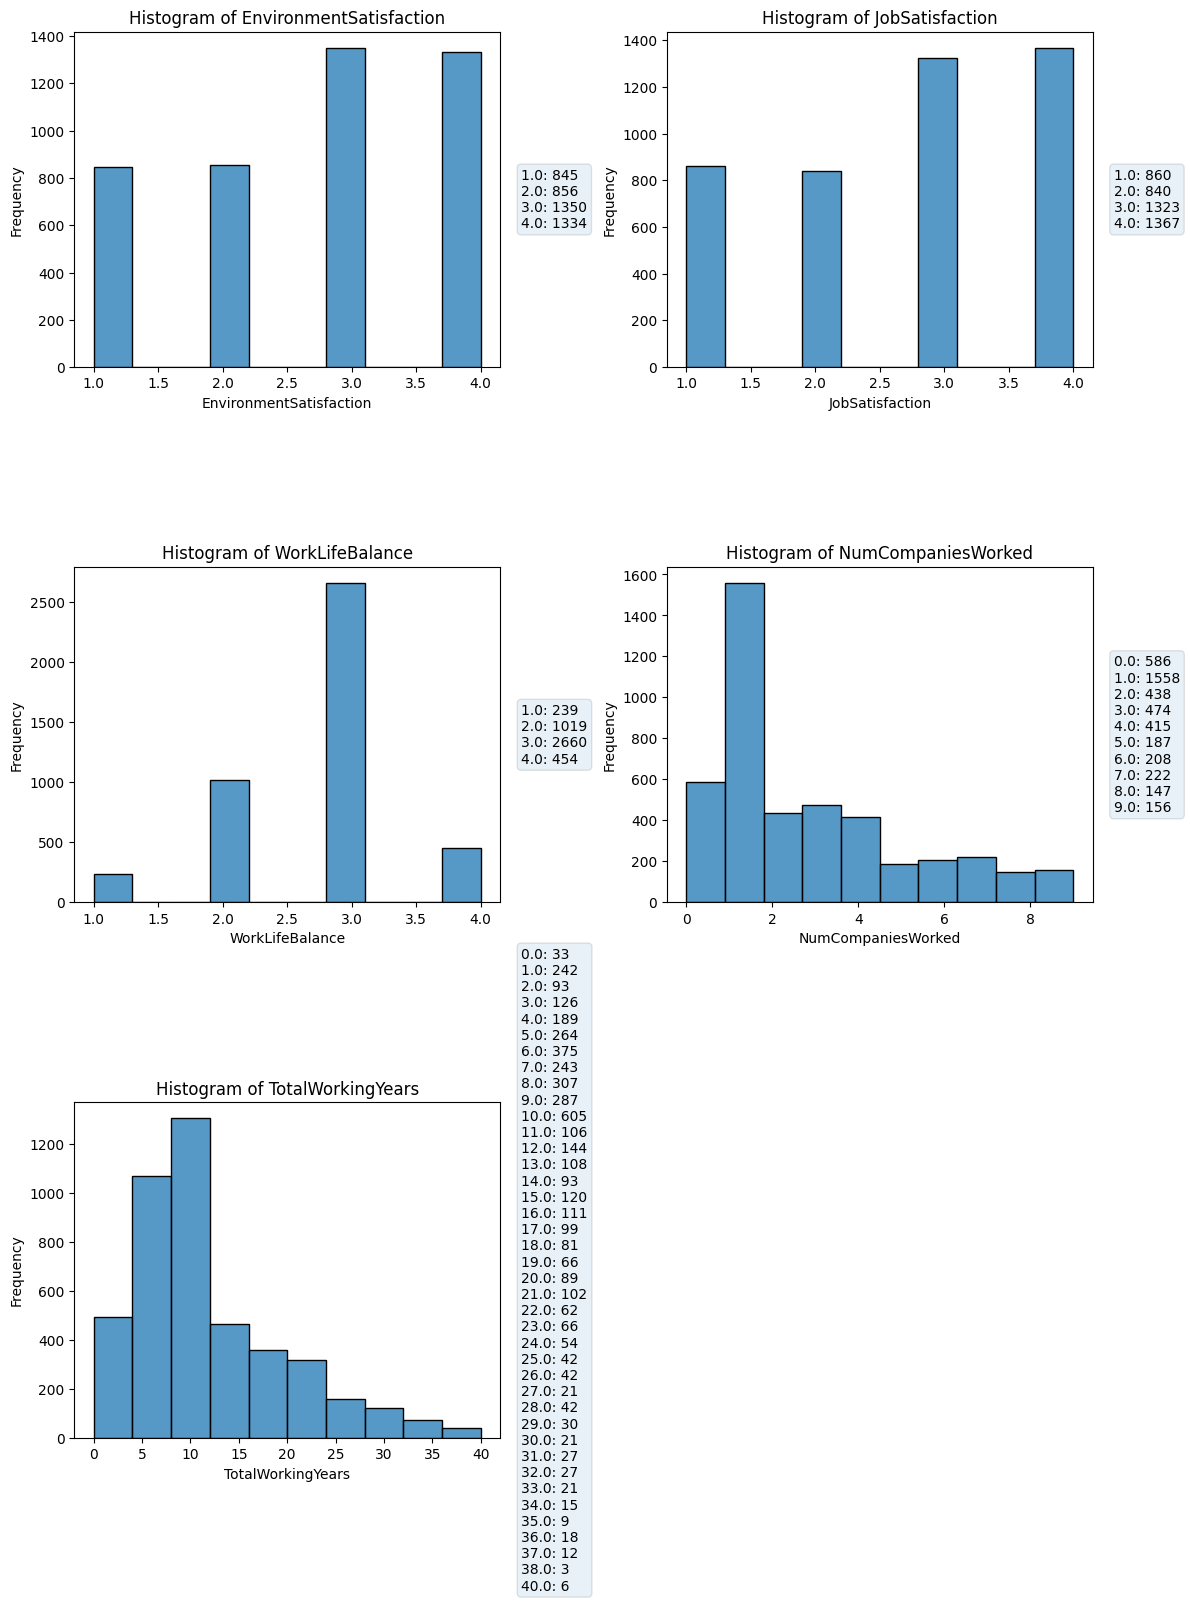

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12, 16))
features_employee_survey_with_missing_value = ["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]
for i, feature in enumerate(features_employee_survey_with_missing_value):
    # Histogram
    sns.histplot(employee_survey_data[feature], ax=axs[i // 2, i % 2], bins=10)
    axs[i // 2, i % 2].set_title(f'Histogram of {feature}')
    axs[i // 2, i % 2].set_xlabel(feature)
    axs[i // 2, i % 2].set_ylabel('Frequency')
    frequency_counts = employee_survey_data[feature].value_counts().sort_index()
    freq_text = "\n".join([f"{val}: {count}" for val, count in frequency_counts.items()])
    axs[i // 2, i % 2].text(1.05, 0.5, freq_text, transform=axs[i // 2, i % 2].transAxes,
                              fontsize=10, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

features_general_data_with_missing_value = ["NumCompaniesWorked", "TotalWorkingYears"]
for i, feature in enumerate(features_general_data_with_missing_value):
    # Histogram
    sns.histplot(general_data[feature], ax=axs[(i + 3) // 2, (i + 3) % 2], bins=10)
    axs[(i + 3) // 2, (i + 3) % 2].set_title(f'Histogram of {feature}')
    axs[(i + 3) // 2, (i + 3) % 2].set_xlabel(feature)
    axs[(i + 3) // 2, (i + 3) % 2].set_ylabel('Frequency')
    frequency_counts = general_data[feature].value_counts().sort_index()
    freq_text = "\n".join([f"{val}: {count}" for val, count in frequency_counts.items()])
    axs[(i + 3) // 2, (i + 3) % 2].text(1.05, 0.5, freq_text, transform=axs[(i + 3) // 2, (i + 3) % 2].transAxes,
                                            fontsize=10, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))
axs[2, 1].axis('off')
plt.tight_layout()
plt.show()

In [11]:
employee_survey_data["EnvironmentSatisfaction"] = employee_survey_data["EnvironmentSatisfaction"].fillna(employee_survey_data['EnvironmentSatisfaction'].mode()[0])
employee_survey_data["JobSatisfaction"] = employee_survey_data["JobSatisfaction"].fillna(employee_survey_data['JobSatisfaction'].mode()[0])
employee_survey_data["WorkLifeBalance"] = employee_survey_data["WorkLifeBalance"].fillna(employee_survey_data['WorkLifeBalance'].mode()[0])
general_data["NumCompaniesWorked"] = general_data["NumCompaniesWorked"].fillna(general_data['NumCompaniesWorked'].median())
general_data["TotalWorkingYears"] = general_data["TotalWorkingYears"].fillna(general_data['TotalWorkingYears'].median())

Missing value pada fitur EnvironmentSatisfaction, JobSatisfaction, dan WorkLifeBalance dapat ditangani dengan mengisi menggunakan nilai modus, karena data bersifat kategorikal. Sedangkan untuk fitur NumCompaniesWorked dan TotalWorkingYears, missing value dapat ditangani dengan mengisi menggunakan nilai median karena berdasarkan visualisasi histogram, distribusi data cenderung tidak normal dan untuk menghindari pengaruh outlier.

### Periksa Data Duplikat

In [12]:
employee_survey_data.duplicated().sum()

np.int64(0)

In [13]:
general_data.duplicated().sum()

np.int64(0)

In [14]:
manager_survey_data.duplicated().sum()

np.int64(0)

Dataset tidak memiliki data yang duplikat

### Transformasi Data

One Hot Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = [
    'Attrition',
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus'
]

encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' menghindari dummy variable trap
encoded_data = encoder.fit_transform(general_data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
general_data_encoded = pd.concat([general_data.drop(columns=categorical_features), encoded_df], axis=1)
general_data_encoded.head()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,1,131160,1.0,11,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,31,10,1,2,1,41890,0.0,23,1,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,32,17,4,3,4,193280,1.0,15,3,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,38,2,5,4,3,83210,3.0,11,3,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,10,1,5,1,23420,4.0,12,2,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
merged_data_1 = pd.merge(general_data_encoded, employee_survey_data, on='EmployeeID', how='inner')

merged_data = pd.merge(merged_data_1, manager_survey_data, on='EmployeeID', how='inner')

merged_data.to_csv('merged_data.csv', index=False)
print("Dataset berhasil digabungkan dan disimpan sebagai 'merged_data.csv'")


Dataset berhasil digabungkan dan disimpan sebagai 'merged_data.csv'


### Load Merged Data

In [17]:
merged_data = pd.read_csv(r"C:\Users\ASUS\Documents\Tugas Kelompok Rakamin\Stage 1\merged_data.csv")

### Buang Fitur EmployeeID

In [18]:
merged_data.drop(columns=['EmployeeID'], inplace=True)

### Heatmap Semua Fitur

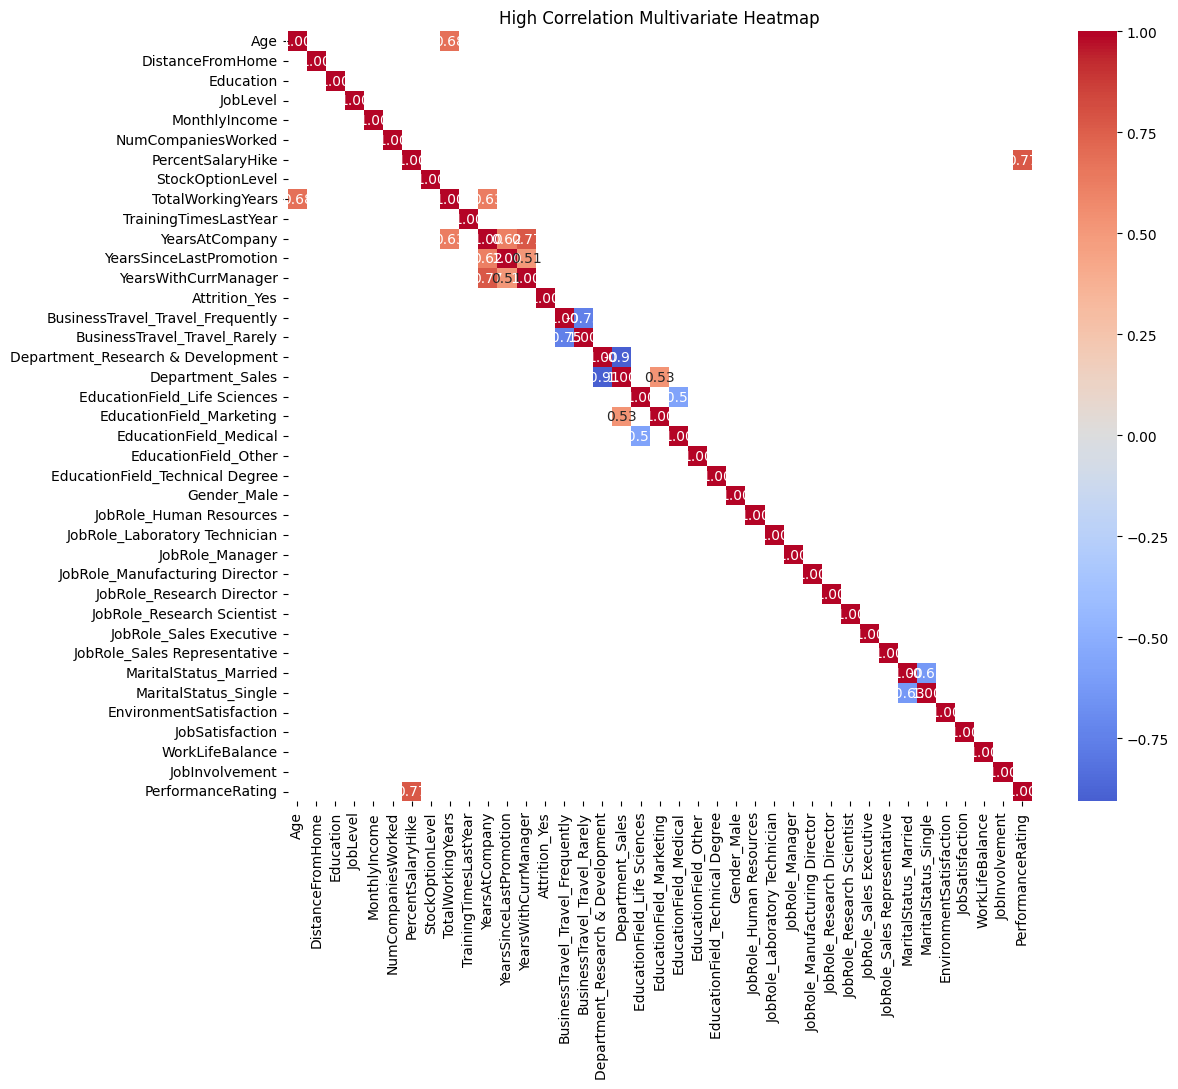

In [19]:
correlation_matrix = merged_data.corr()
high_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('High Correlation Multivariate Heatmap')
plt.show()

### Seleksi Fitur

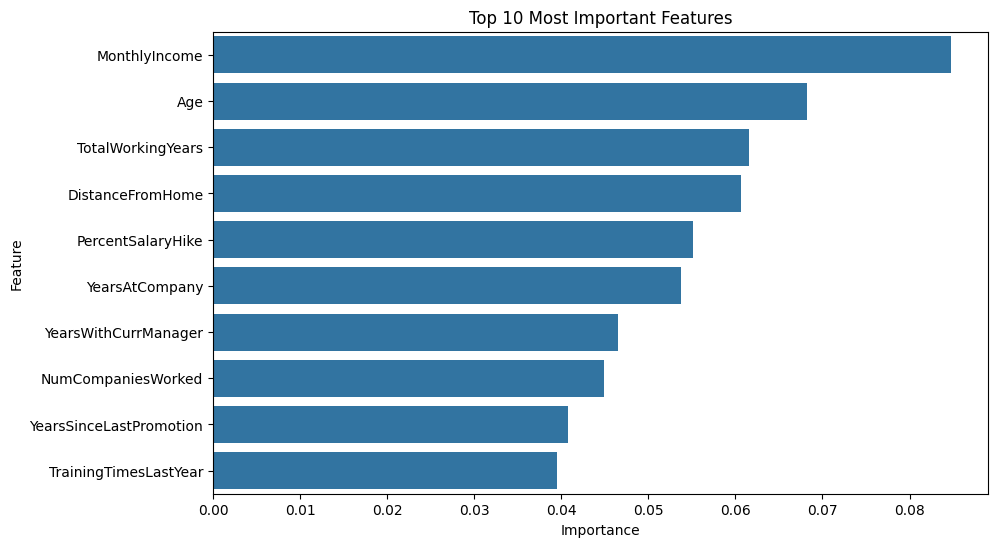

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Memuat dataset gabungan
merged_data = pd.read_csv('merged_data.csv')

# Memisahkan fitur dan target (misalkan 'JobSatisfaction' adalah target)
X = merged_data.drop('JobSatisfaction', axis=1)
y = merged_data['JobSatisfaction']

# Menghilangkan kolom non-numerik jika ada
X = X.select_dtypes(include=['float64', 'int64'])

# Membangun model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Mendapatkan feature importances
feature_importances = model.feature_importances_

# Membuat DataFrame untuk fitur dan pentingnya
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi fitur yang paling berpengaruh
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')  # Menghapus palette
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 2. Univariate Analysis

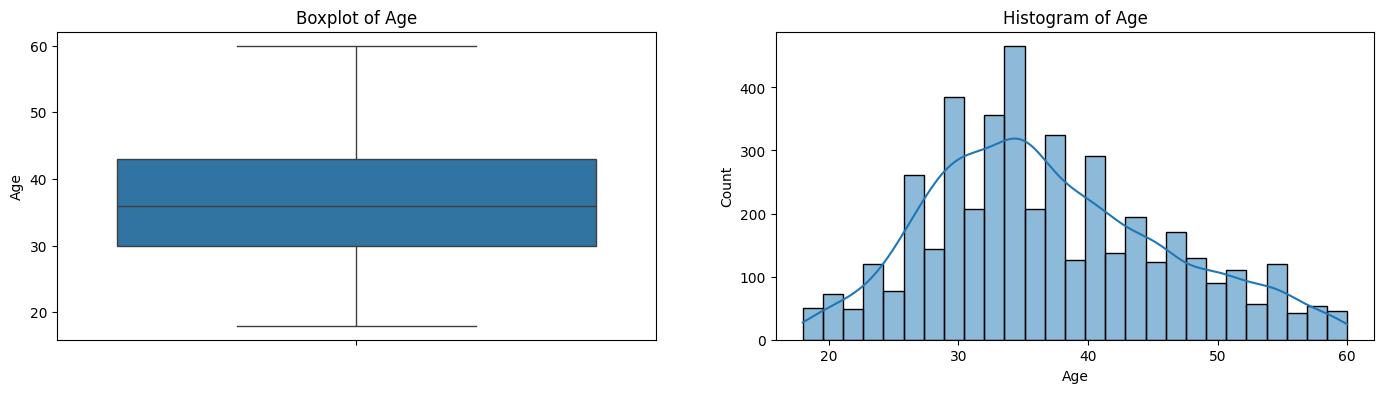

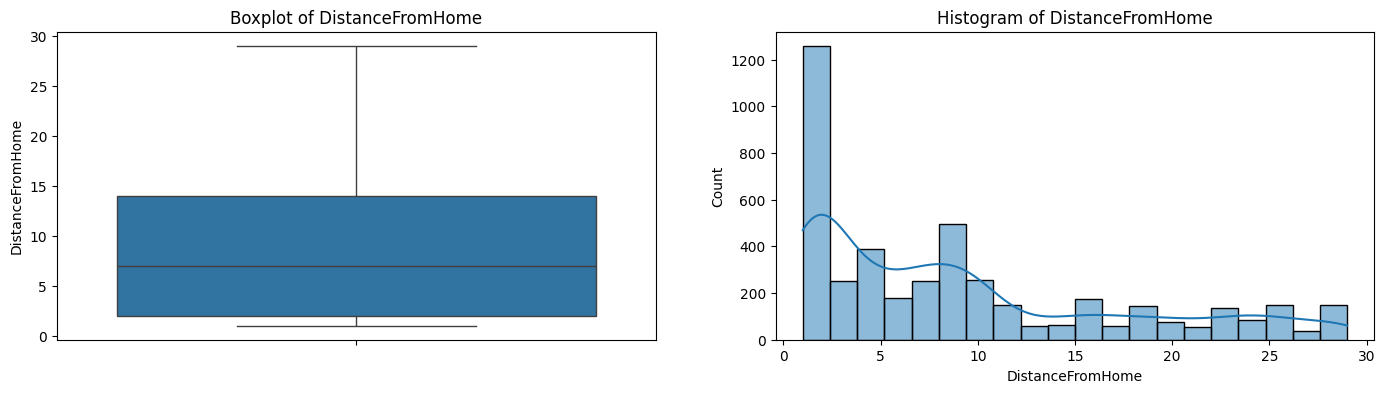

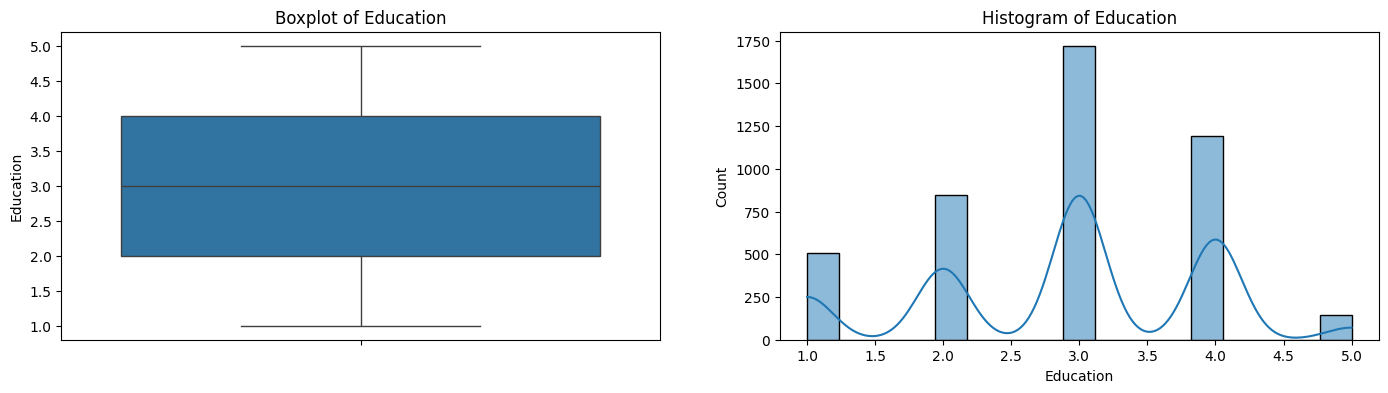

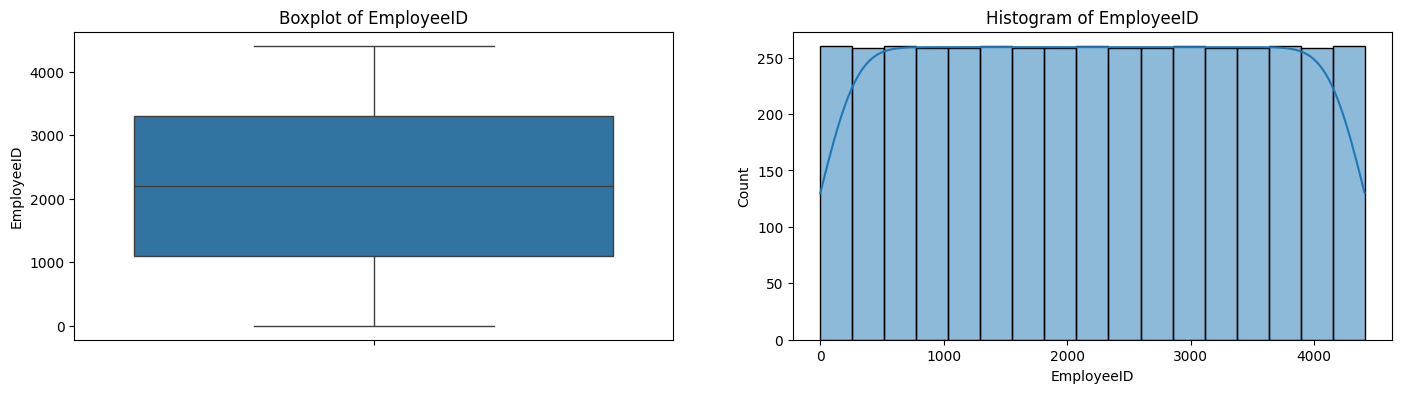

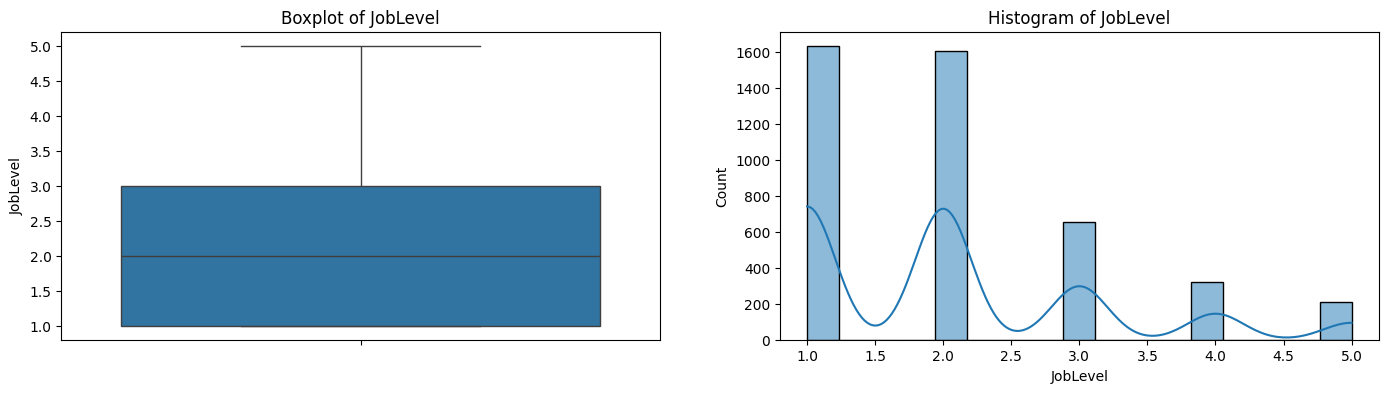

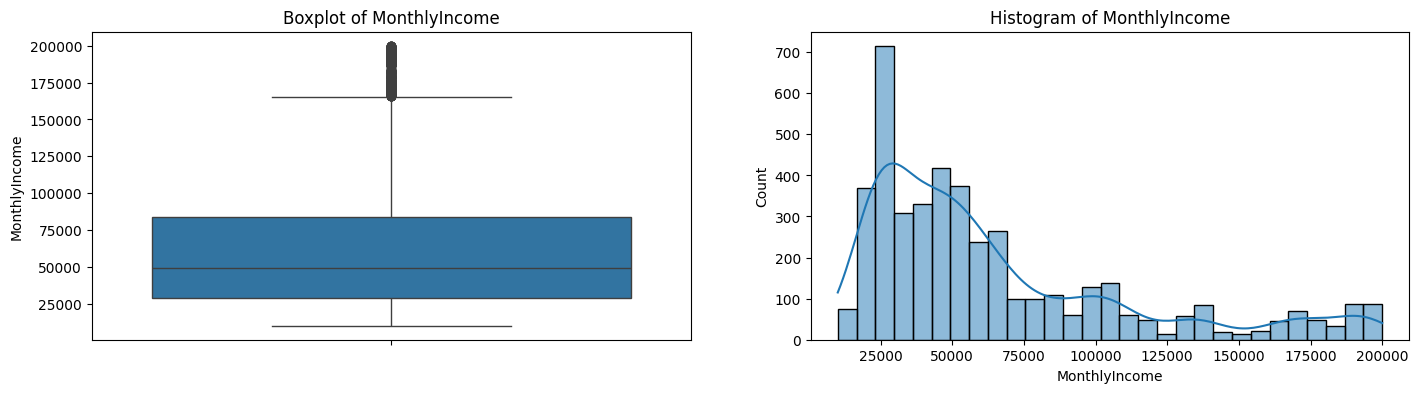

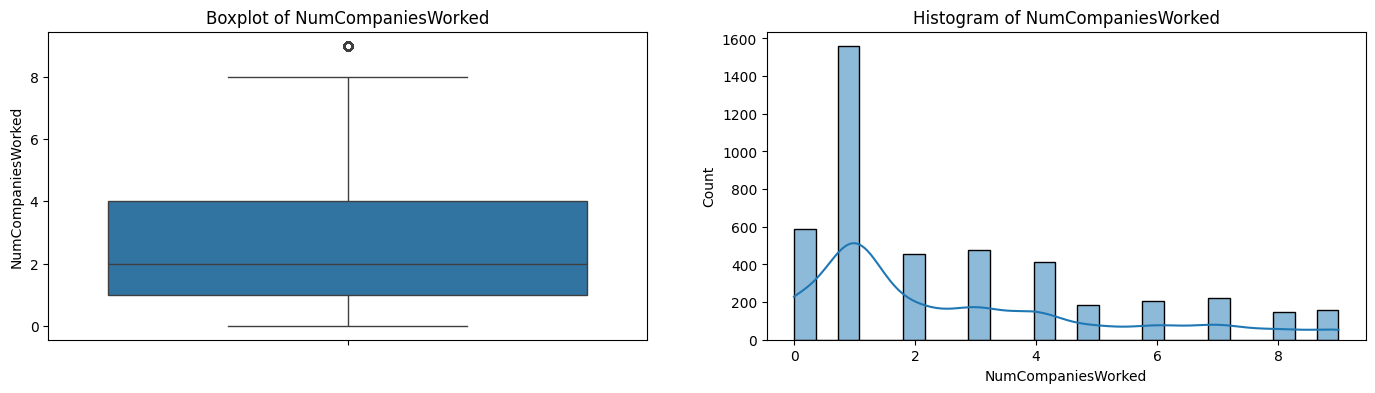

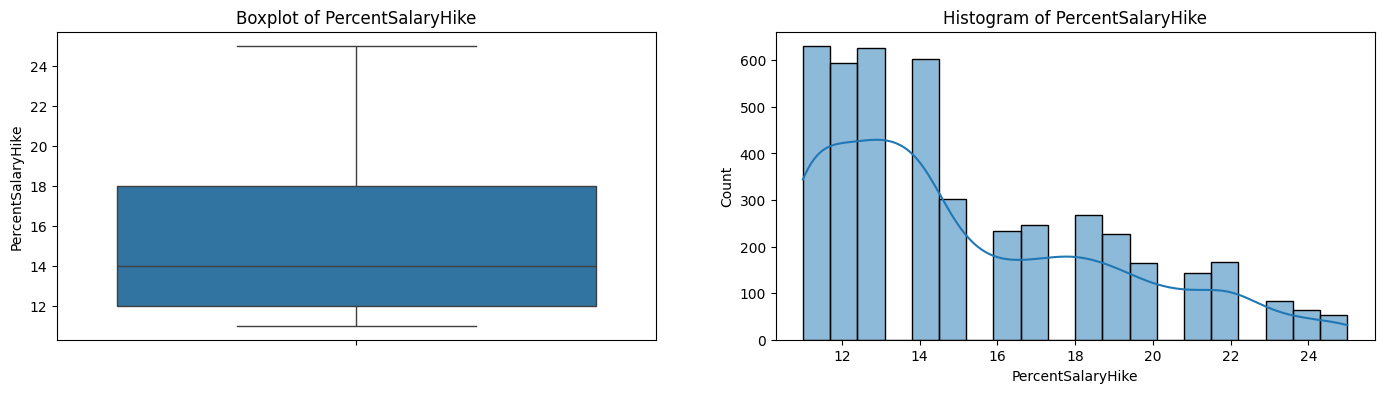

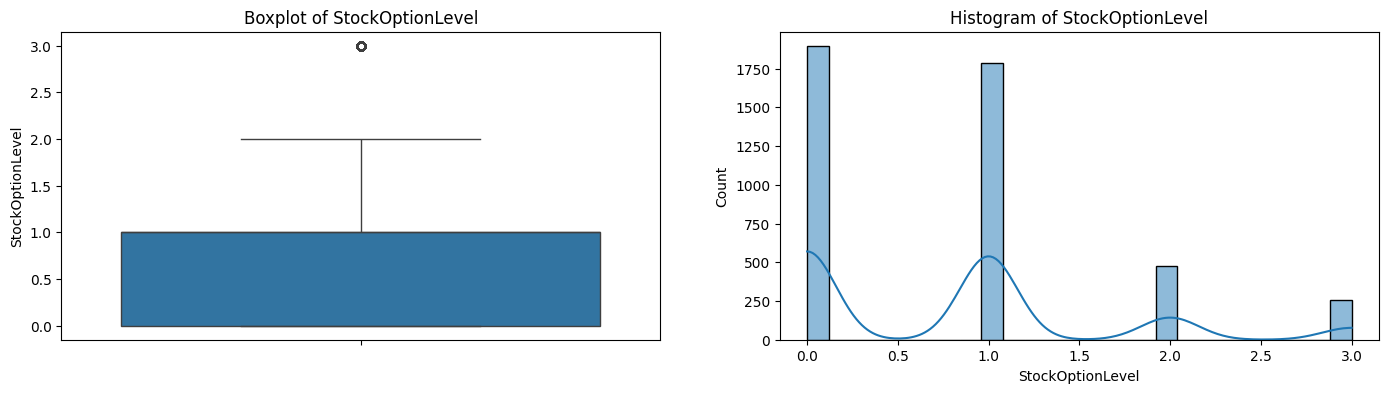

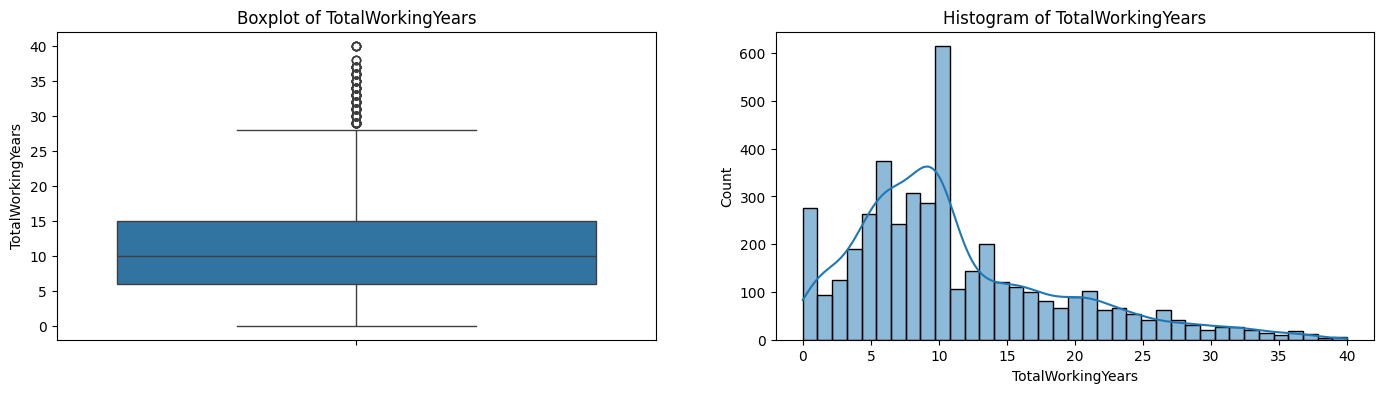

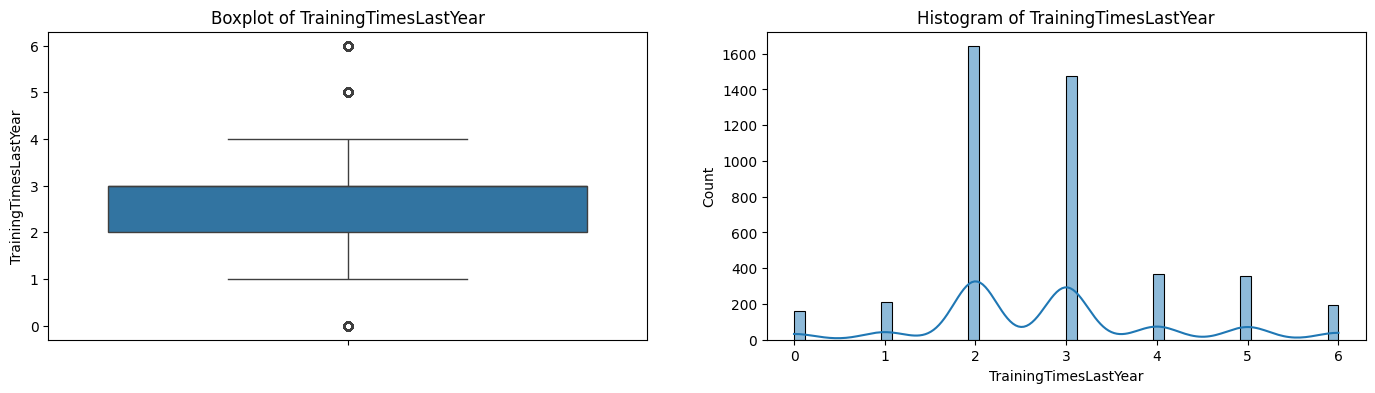

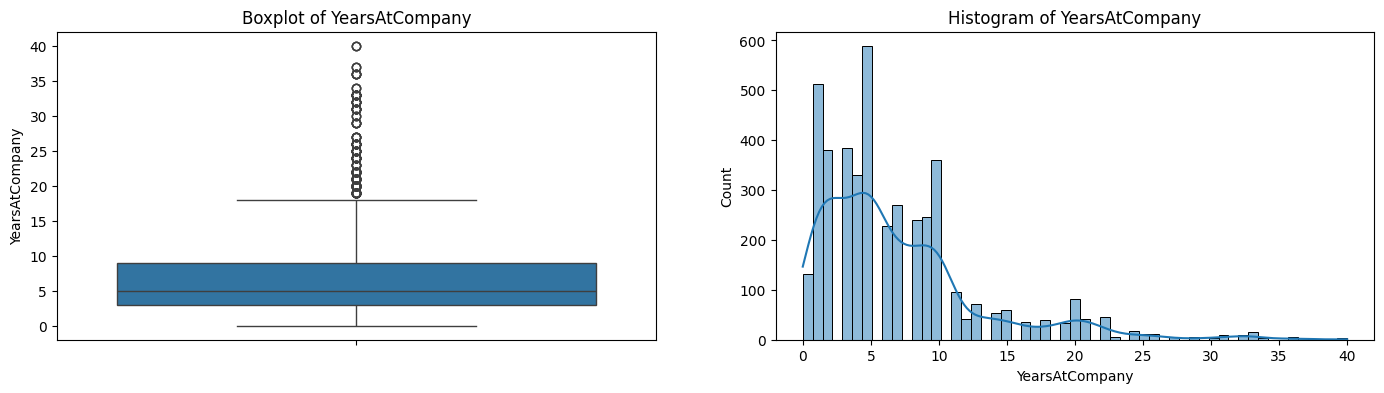

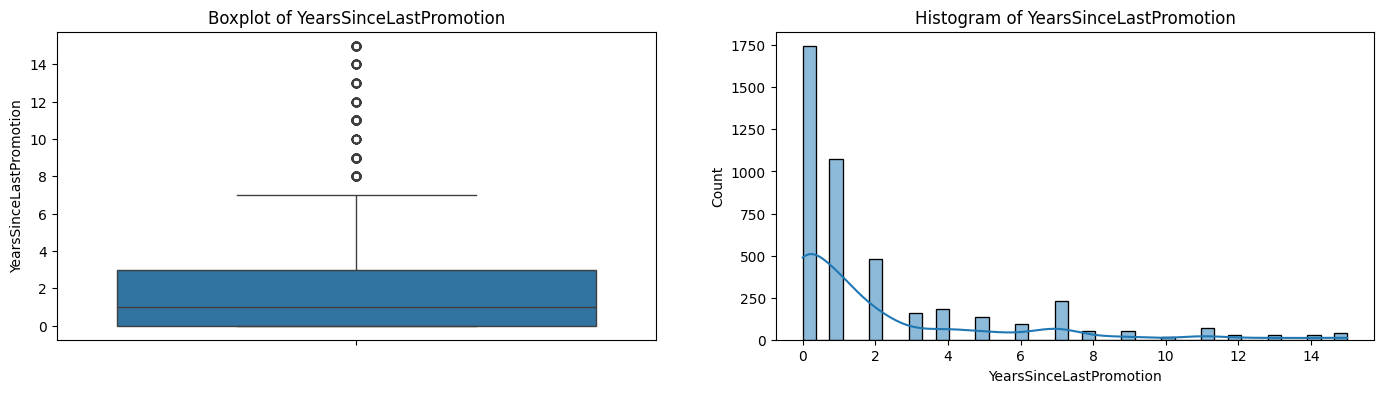

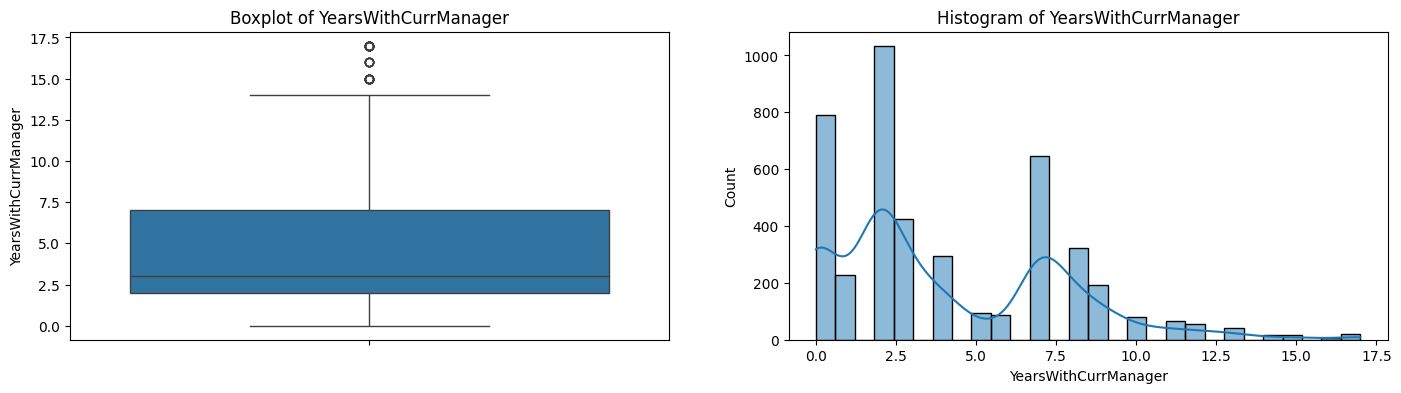

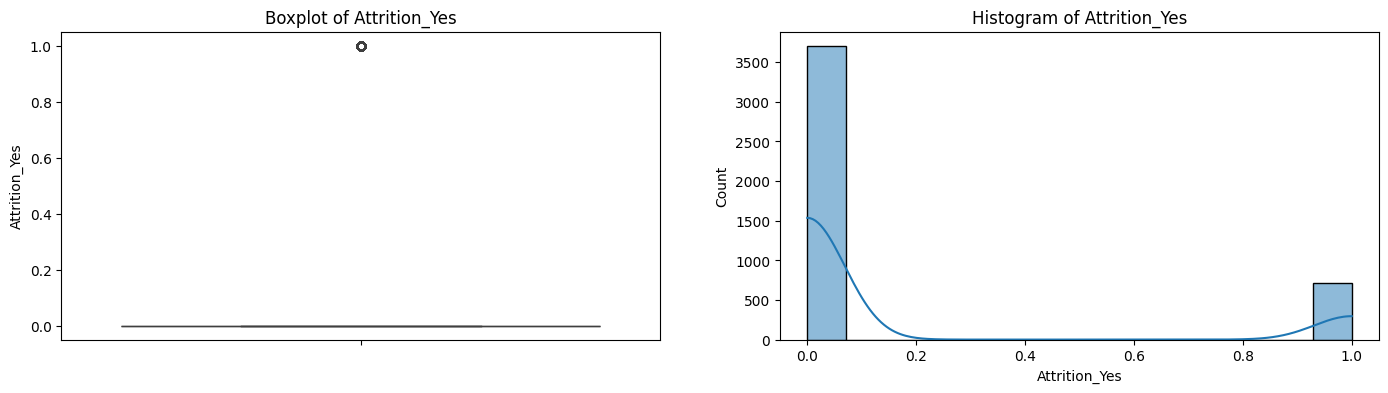

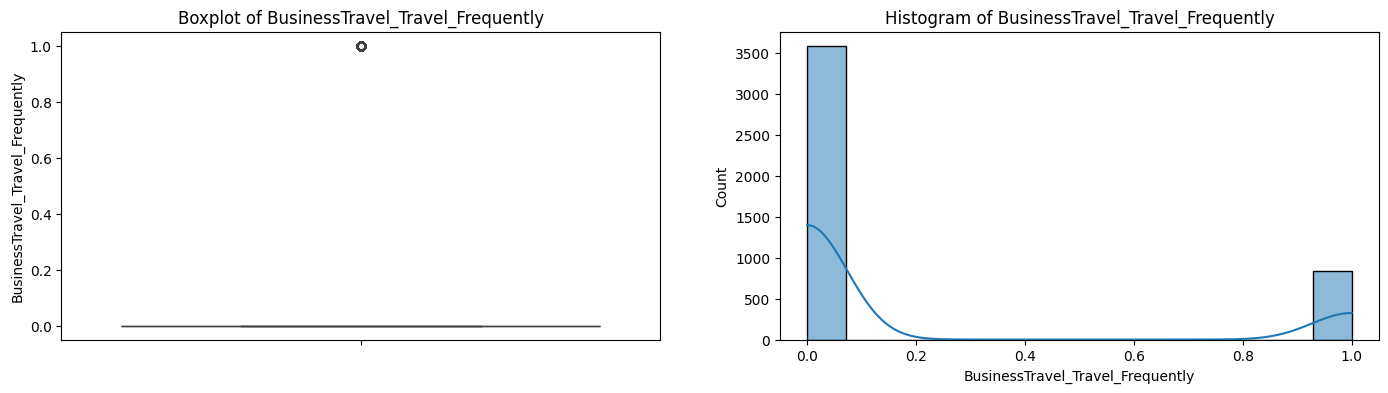

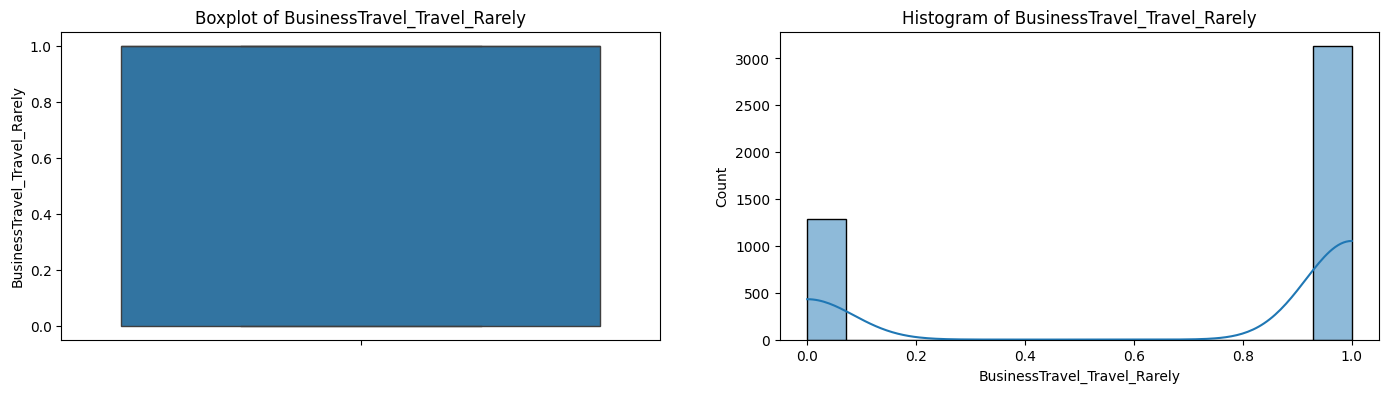

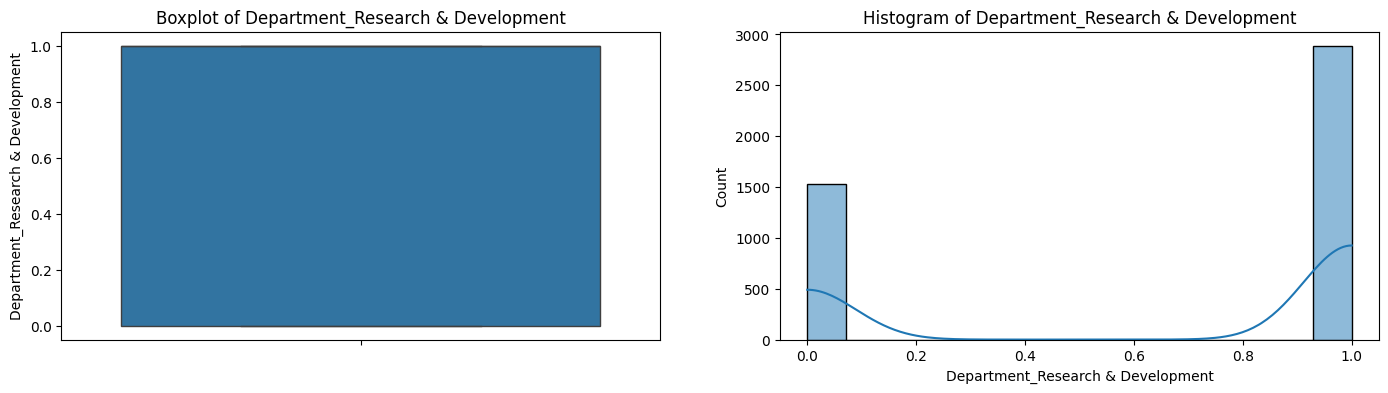

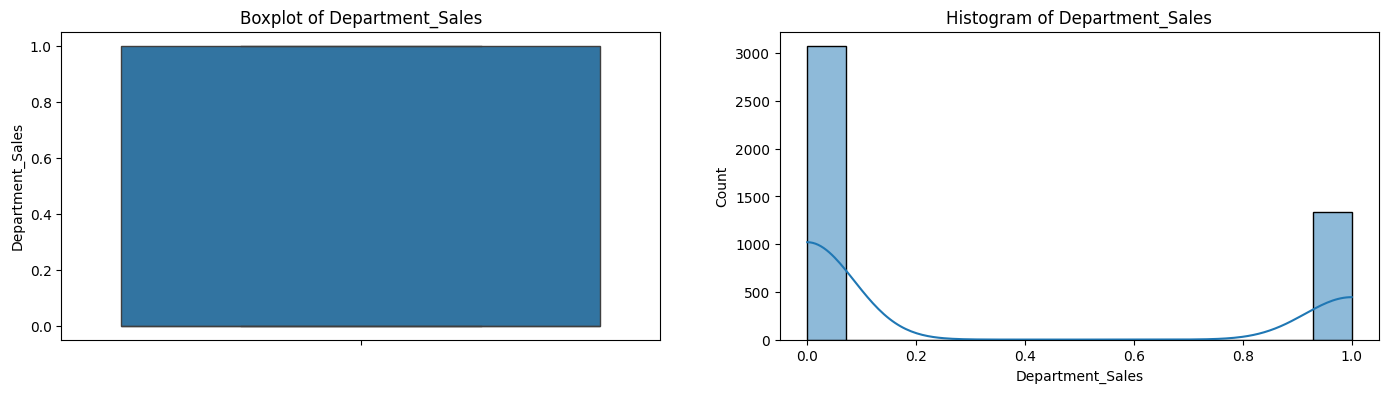

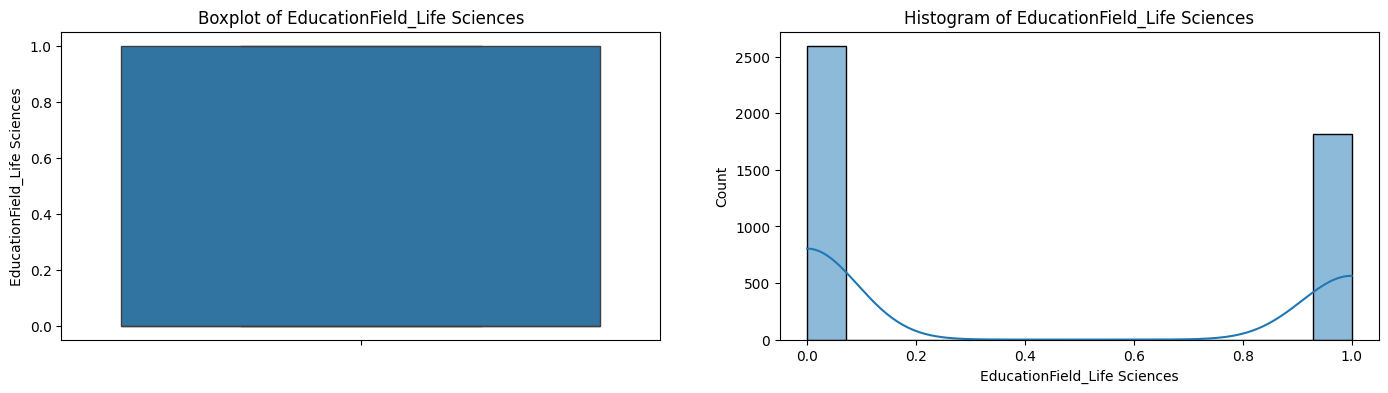

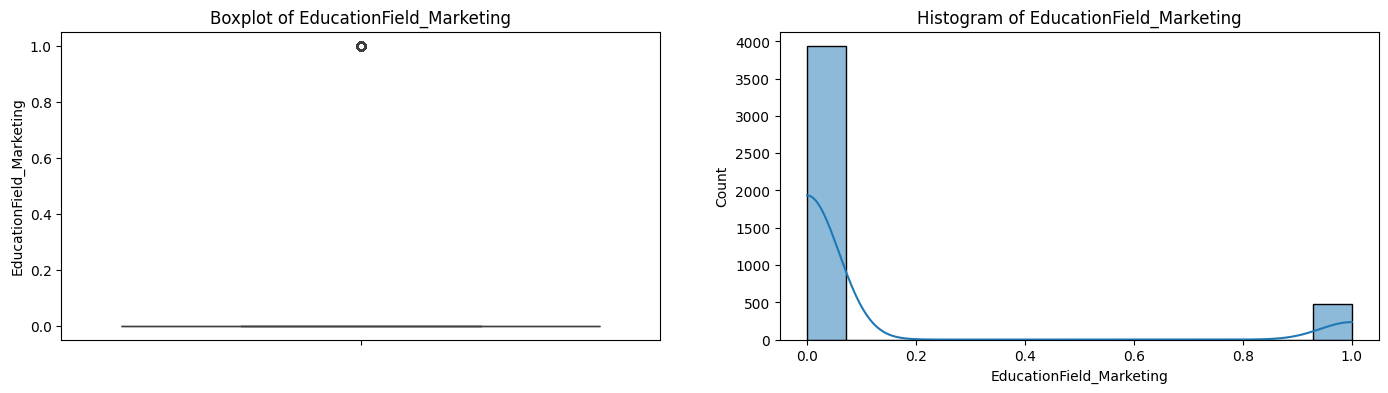

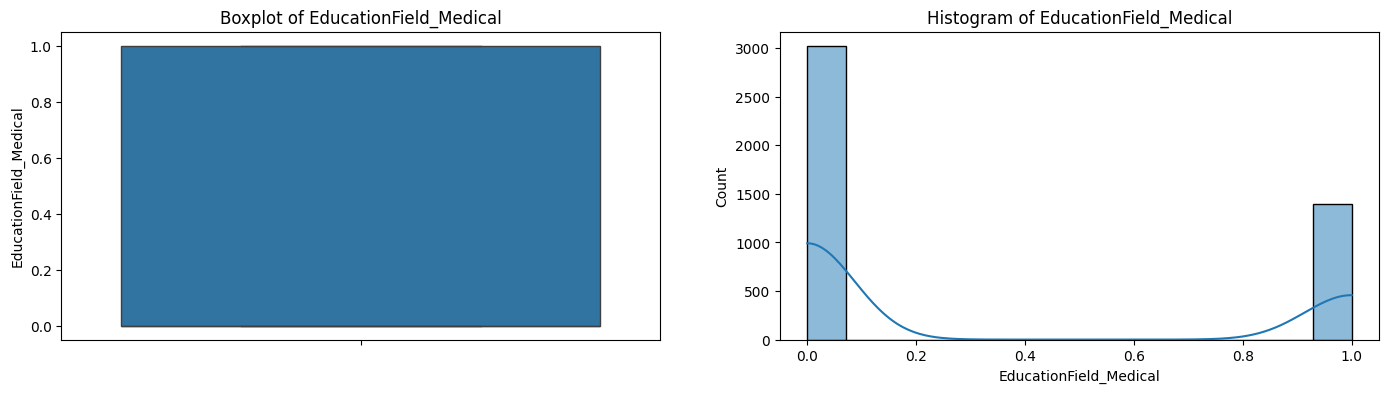

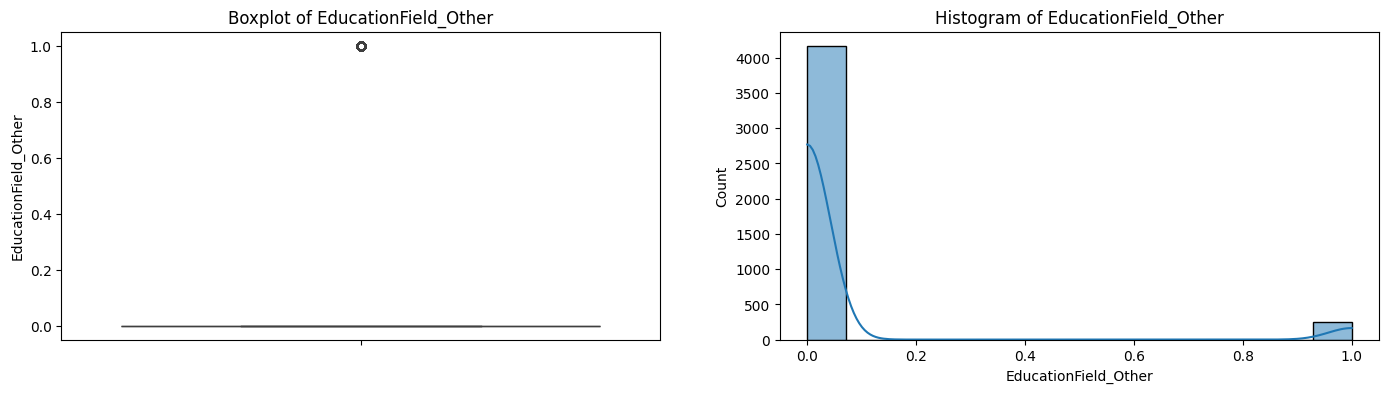

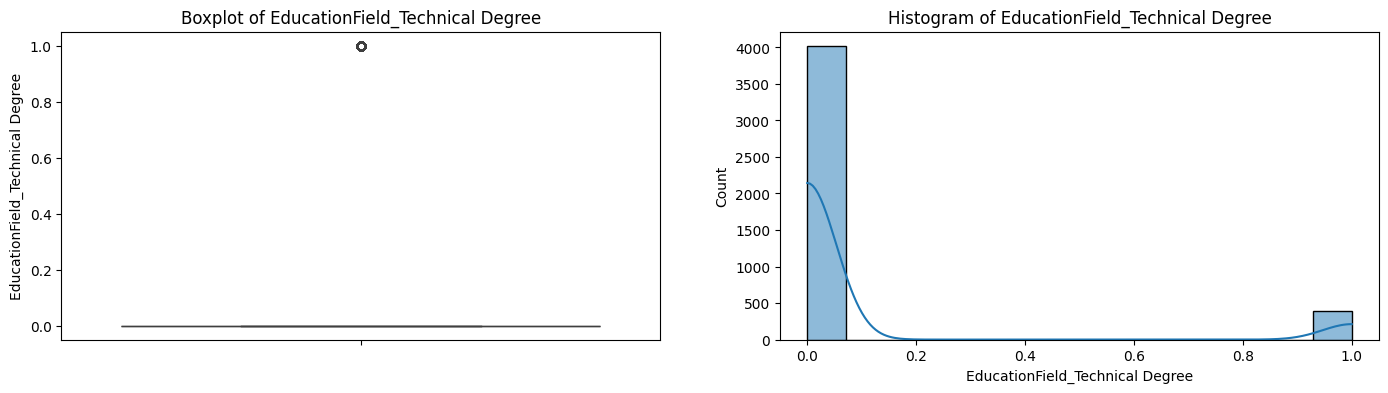

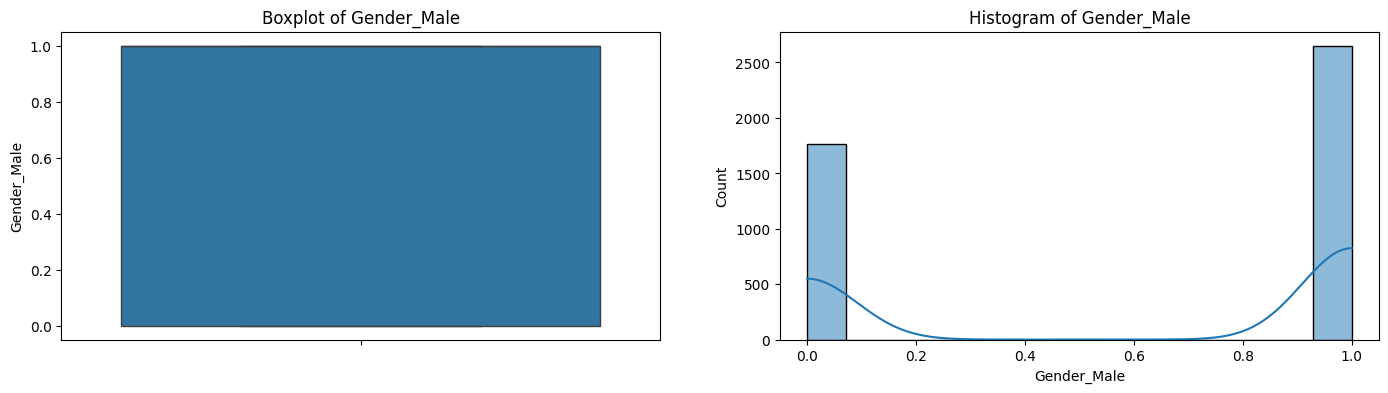

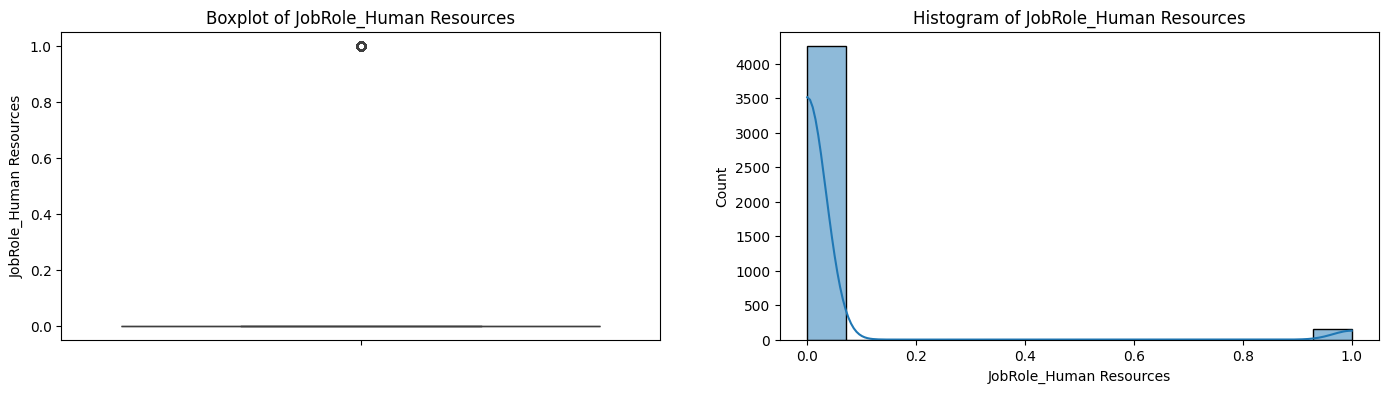

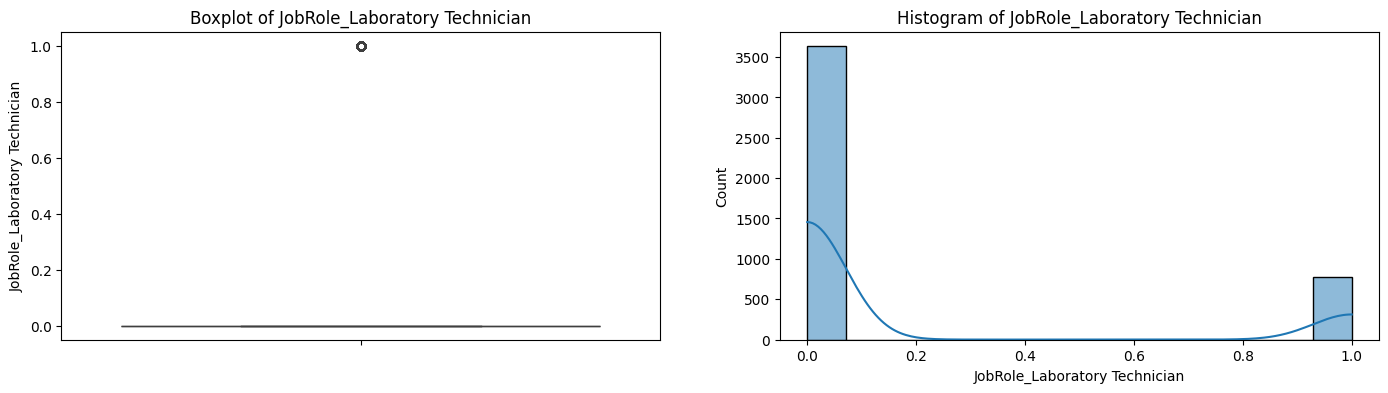

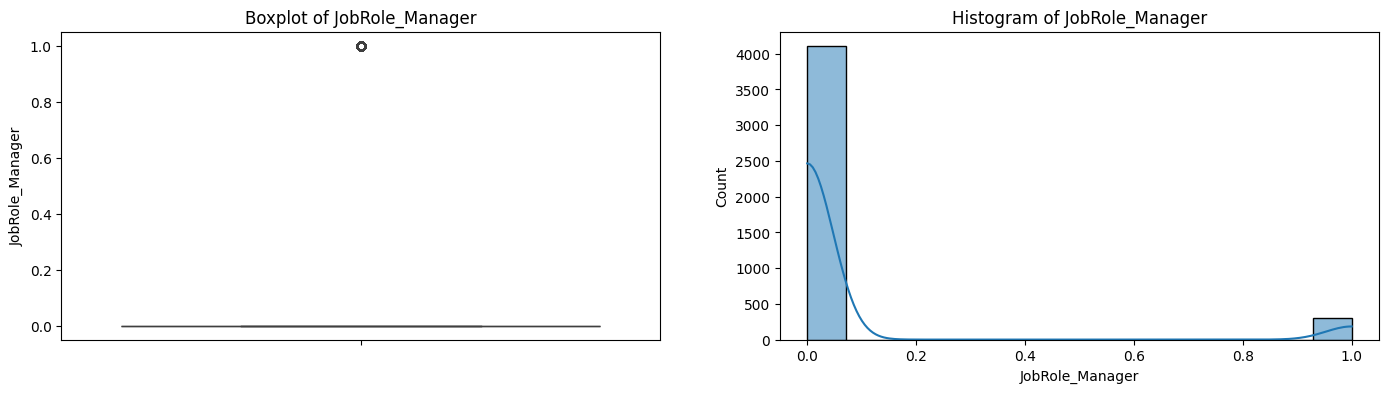

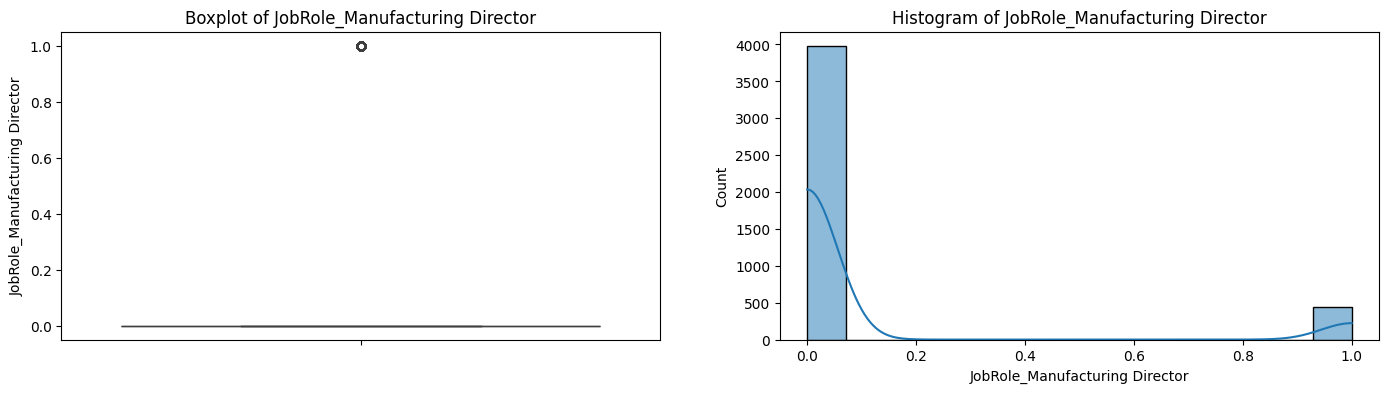

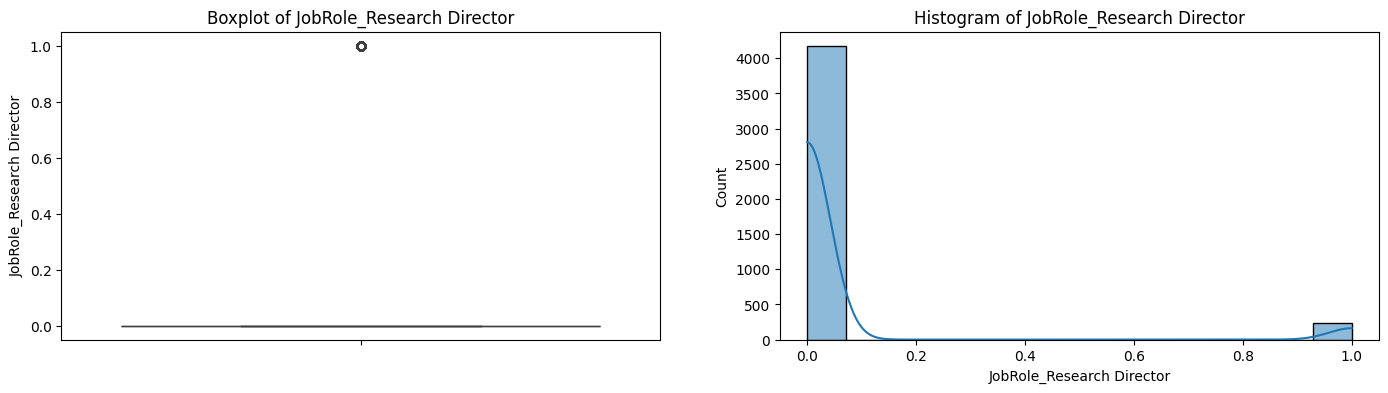

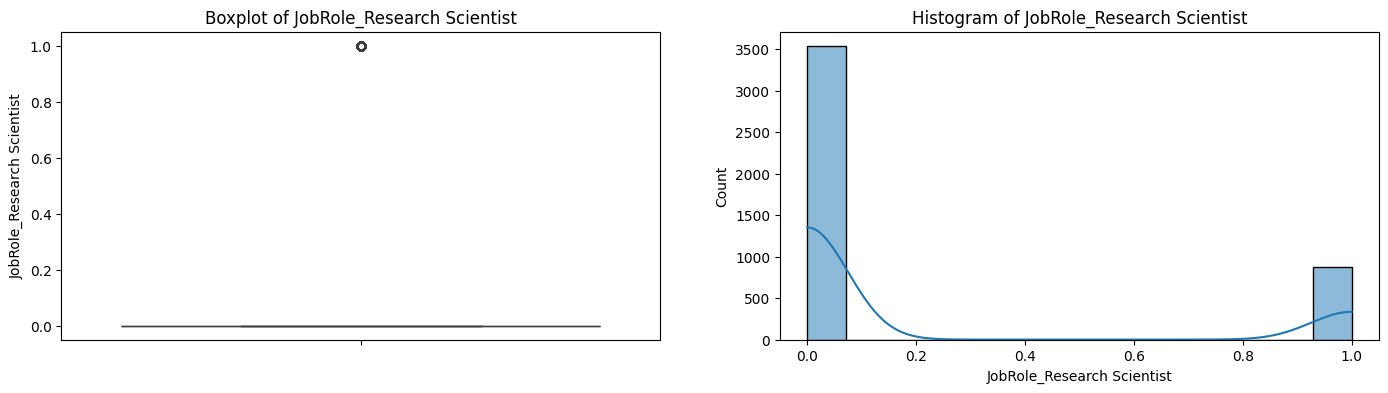

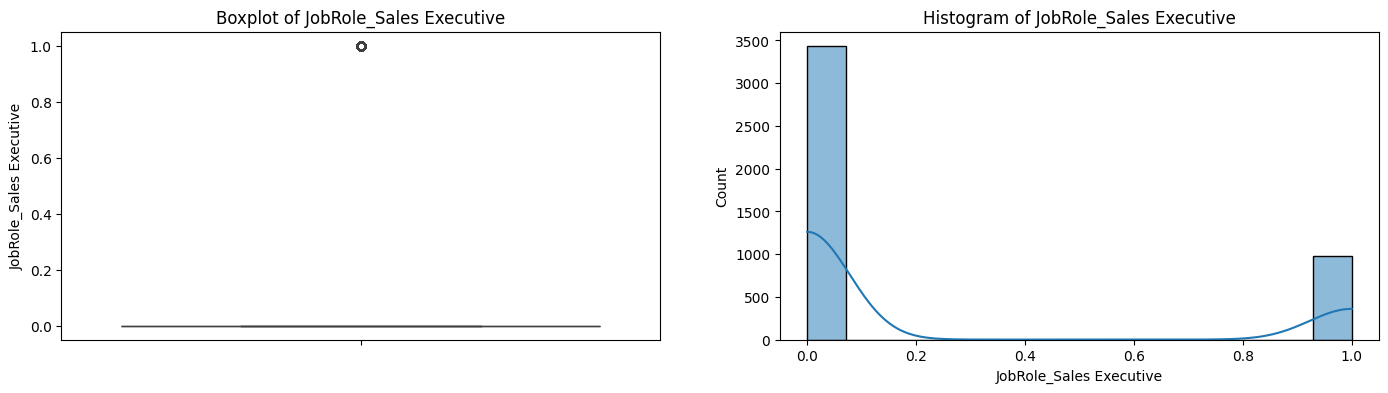

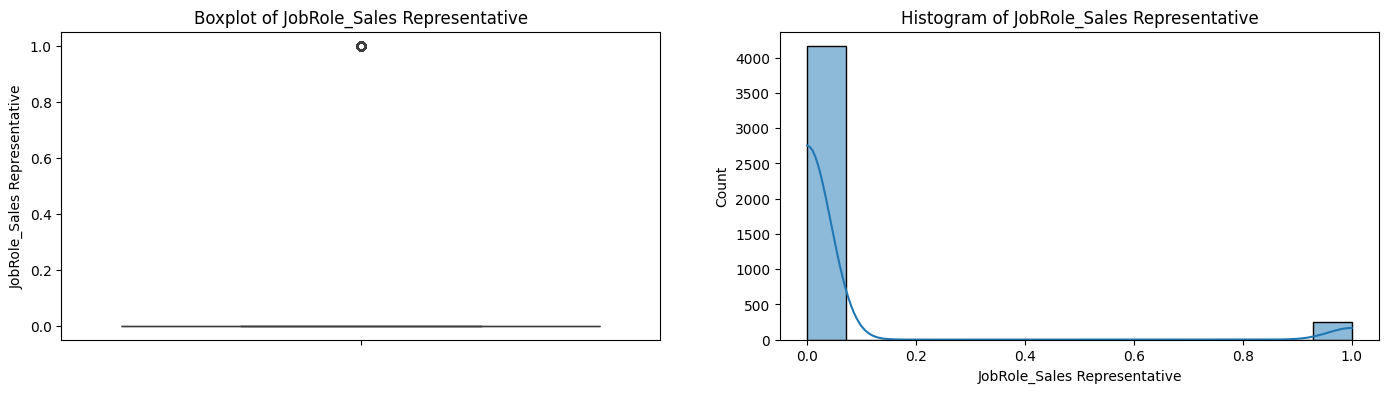

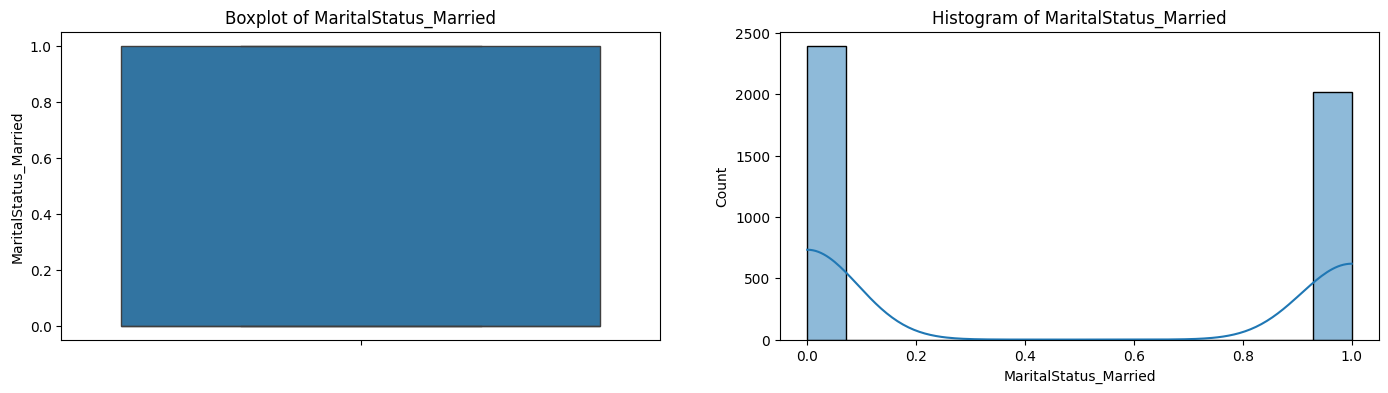

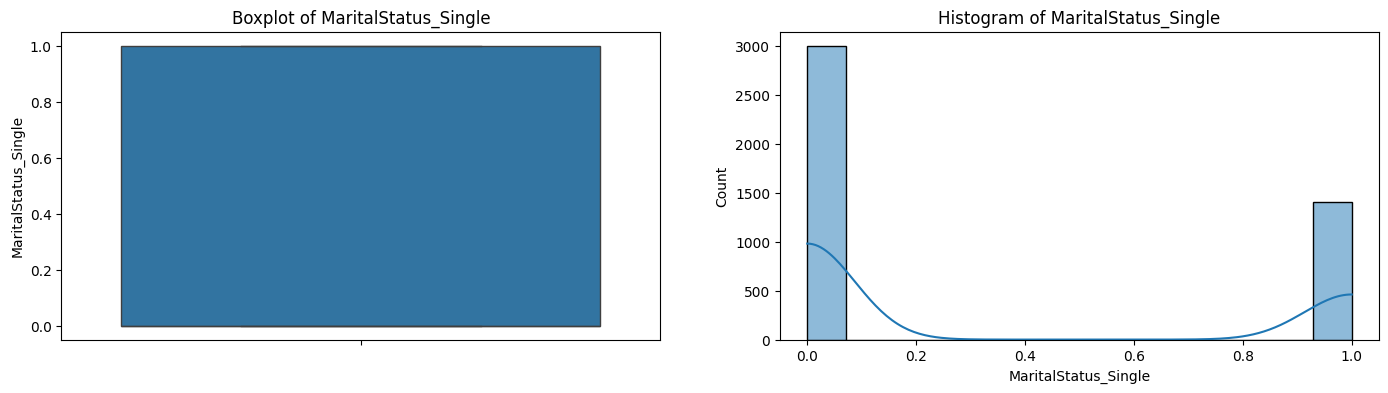

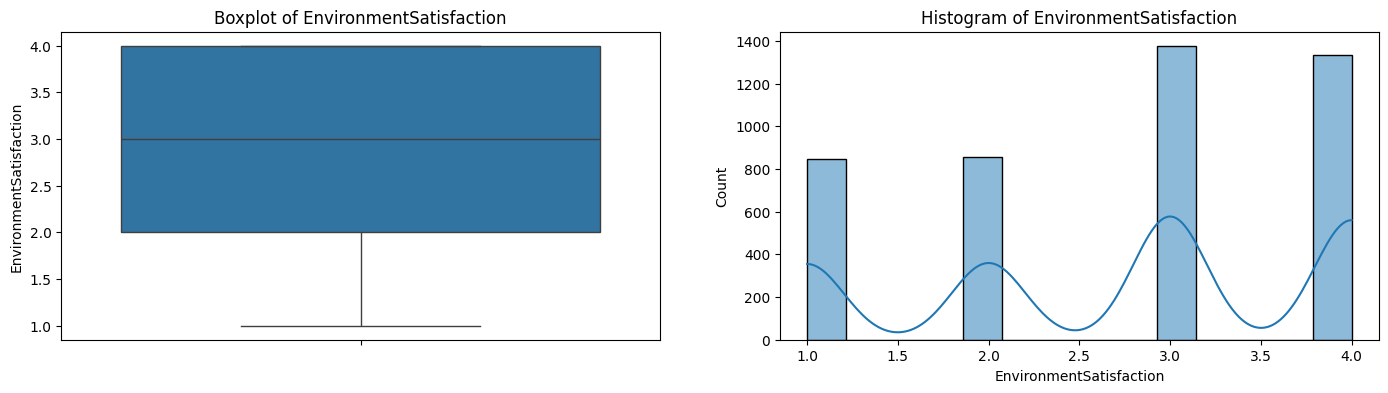

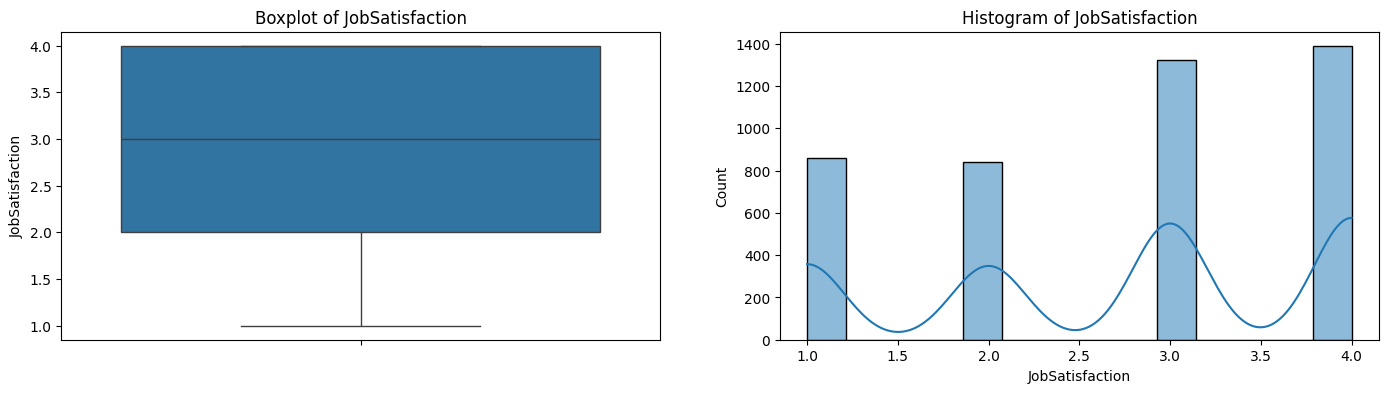

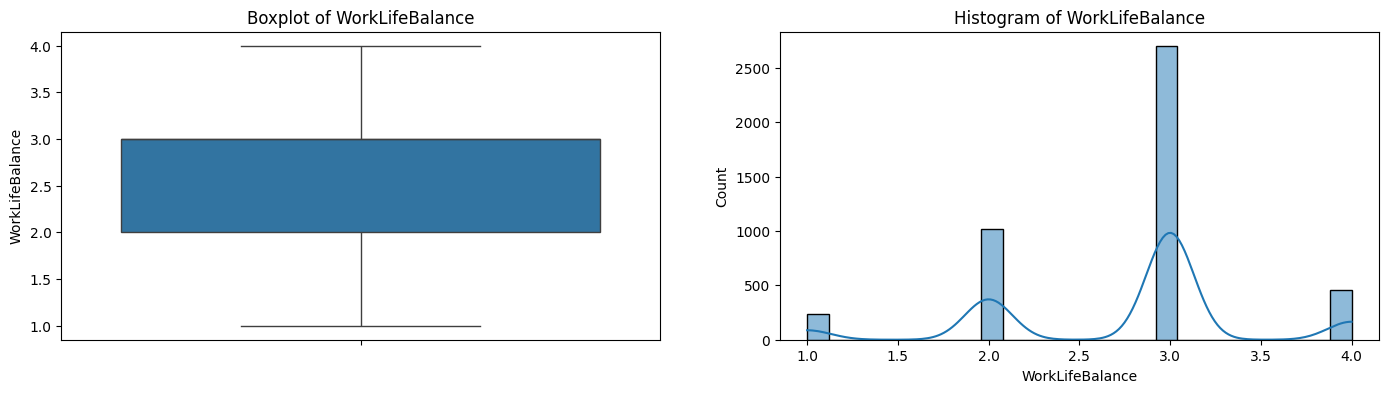

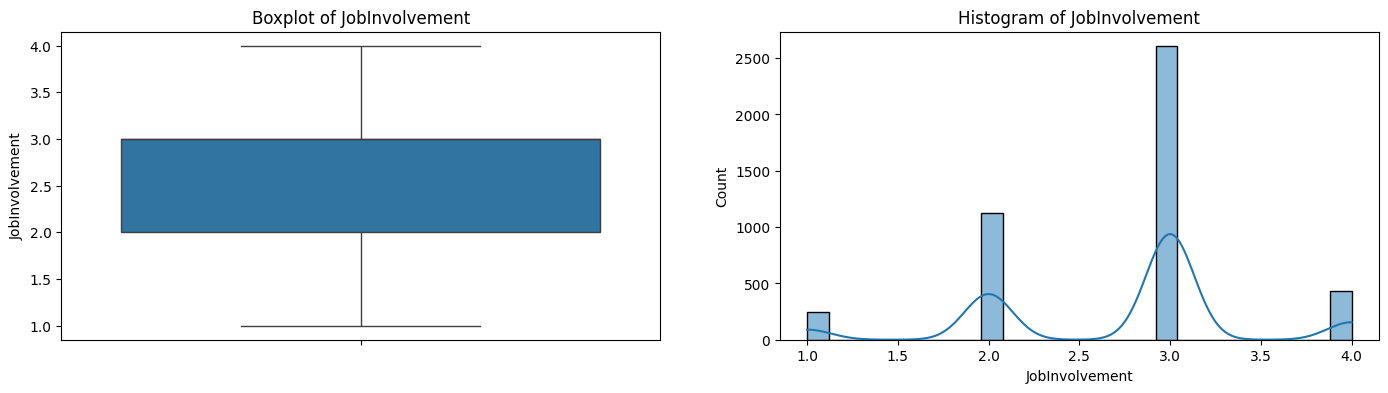

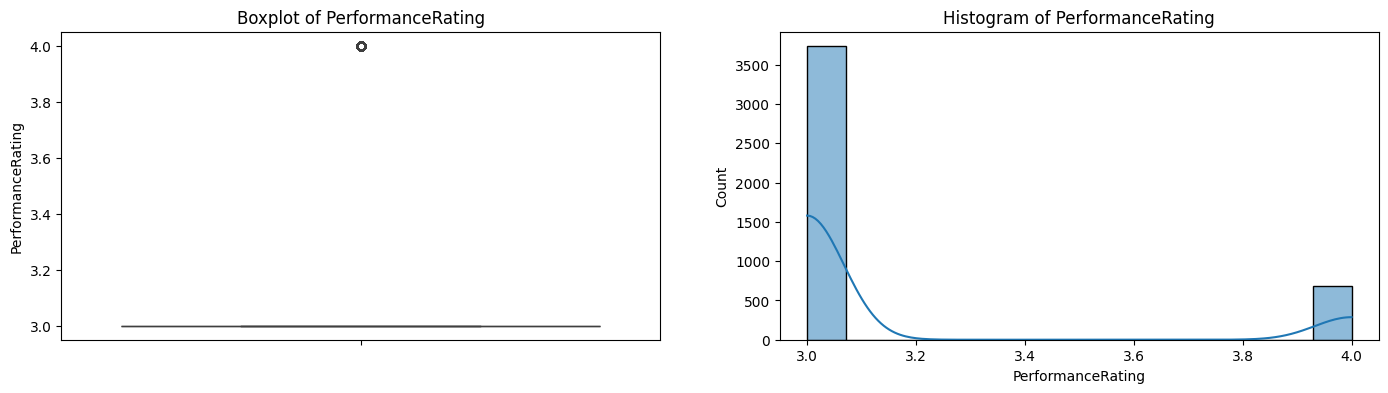

In [21]:
number_columns = merged_data.select_dtypes(include=np.number).columns
for column in number_columns:
    fig, axes = plt.subplots(1, 2, figsize=(17, 4))
    
    sns.boxplot(merged_data[column], ax=axes[0])
    axes[0].set_title(f'Boxplot of {column}')
    
    sns.histplot(merged_data[column], kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    
    plt.show()

## Insights Univariate Analysis

1. Feature: YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany, TrainingTimesLastYear, TotalWorkingYears, dan MonthlyIncome memiliki outier.
2. Feature: WorkLifeBalance, JobInvolvement, TrainingTimesLastYear, Education, dan Age memiliki sebaran data normal.
3. Feature: JobSatisfaction dan EnvironmentSatisfaction memiliki sebaran data negative skewed
4. Feature: YearsSinceLastPromotion, YearsAtCompany, TotalWorkingYears, PercentSalaryHike, NumCompanyWorked, MonthlyIncome, JobLevel, dan DistanceFromHome memiliki sebaran data positive skewed
5. Feature: YearsWithCurrManager memiliki sebaran data multimodal

## 3. Multivariate Analysis

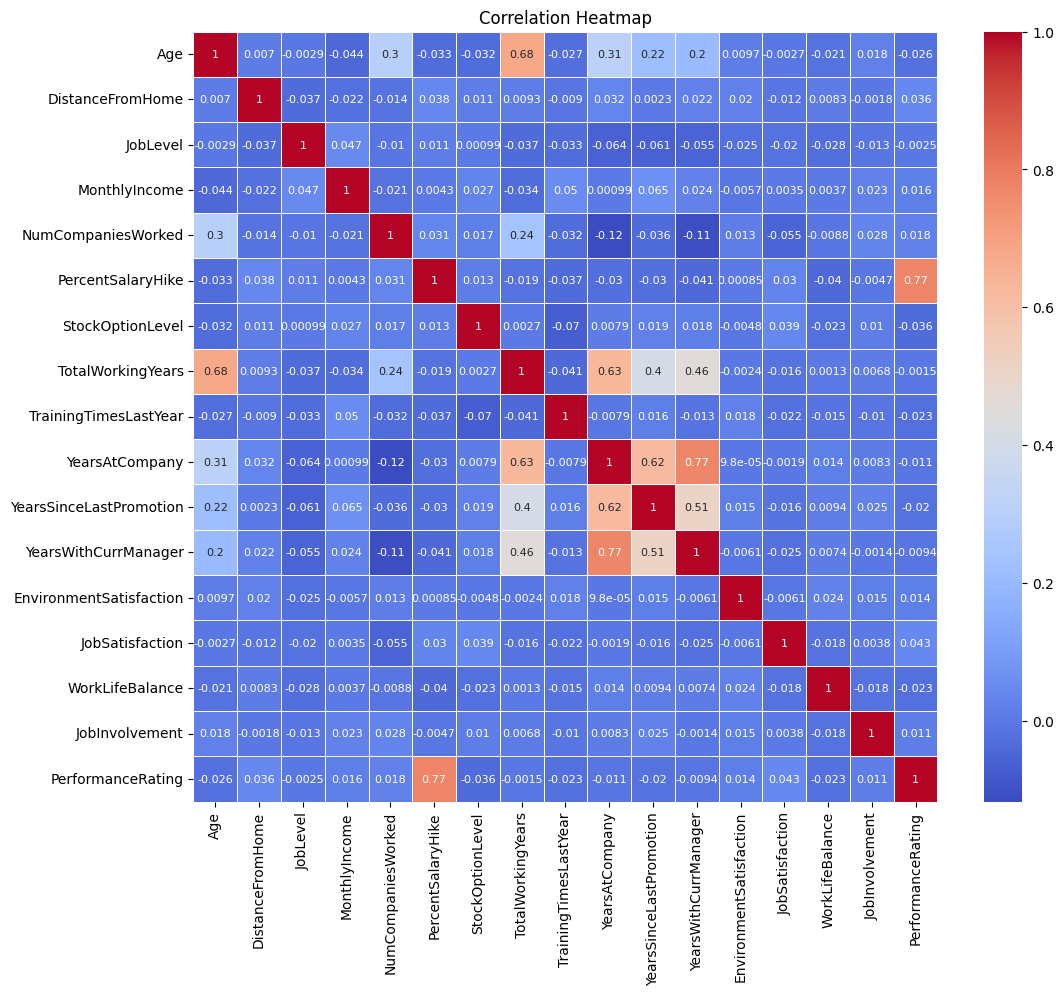

In [22]:
corr_matrix = merged_data[['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating' ]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

## Insights Multivariate Analysis

1. Kolom PercentSalaryHike, StockOptionLevel, dan Performance rating berkorelasi 3-4% dengan target (Job satisfaction)
2. Kolom MonthlyIncome dan JobInvolvement berkorelasi lemah yaitu 0.3% dengan target (Job satisfaction)
3. PerformanceRating dengan PercentSalaryHigh berkorelasi positif 77%, tidak cukup tinggi untuk dihapus salah satunya